This is an extremely simple analysis of the length of videos uploaded to the Internet Archive. The focus of the exercise was in learning how to use the Internet Archive's JSON API to create the dataset that I wanted. 

At present, this is based on videos uploaded from June 1, 2024 through June 20, 2024 becaue that is all I have scraped so far. 

In [24]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

conn = sqlite3.connect('iadb.sqlite')
cur = conn.cursor()

In [25]:
cur.execute('''
select 
case 
	when file_length/60 <= 10 then '1. <10 Minutes'
	when file_length/60 <= 30 then '2. 10-30 Minutes'
	when file_length/60 <= 60 then '3. 30-60 Minutes'
	when file_length/60 <= 120 then '4. 60-120 Minutes'
	else '5. >120 Minutes'
end as length_bin
, count(*) as n_files
from Videos
group by length_bin
order by length_bin
            ''')

length_hist = cur.fetchall()

print(length_hist)

[('1. <10 Minutes', 3235), ('2. 10-30 Minutes', 1546), ('3. 30-60 Minutes', 2891), ('4. 60-120 Minutes', 1495), ('5. >120 Minutes', 833)]


In [26]:
df = pd.DataFrame(length_hist)

(array([3235.,    0., 1546.,    0.,    0., 2891.,    0., 1495.,    0.,
         833.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

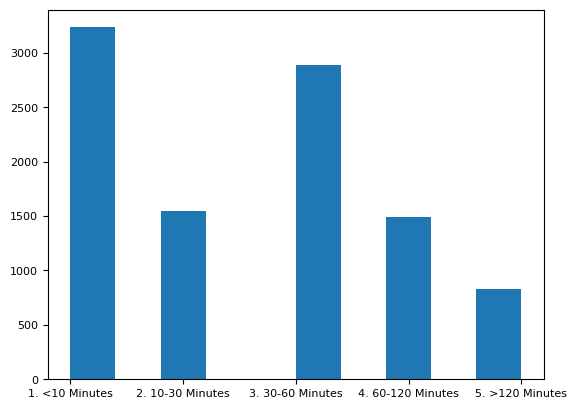

In [27]:
plt.hist(df[0], weights=df[1])